In [1]:
import numpy as np
import pandas as pd

# Data extraction

In [2]:
# Read raw data from excel
satic_expreriments_data = pd.read_excel('data/biogas_data_clean.xlsx', sheet_name='static', header=None)


In [3]:
# Data in excel are not in the desired form, we need to extract and arrange in proper way
inputs = satic_expreriments_data.iloc[:3,1::6].astype(float).to_numpy().transpose()
outputs1 = satic_expreriments_data.iloc[5:,1::6].astype(float).to_numpy()
outputs2 = satic_expreriments_data.iloc[5:,5::6].astype(float).to_numpy()
outputs2 = outputs2/1000 # scale down to particles per thousand fro particles per million

In [4]:
# Make sure dimensions are equal
assert outputs1.shape == outputs2.shape
assert inputs.shape[0] == outputs1.shape[1]
assert inputs.shape[1] == 3

In [5]:
timesteps = outputs1.shape[0]
num_batches = outputs1.shape[1]
print(f"There are {num_batches} expreriments (batches) with {timesteps} timesteps in each one")

There are 100 expreriments (batches) with 160 timesteps in each one


In [6]:
# Extract the data in the proper form and convert each batch to DataFrame
# Store all batches in a list
batches = list()
for i in range(num_batches):
    temp_inputs = np.tile(inputs[i],(timesteps,1))
    temp_outputs = np.column_stack((outputs1[:,i], outputs2[:,i]))
    temp_batch = np.column_stack((temp_inputs, temp_outputs))
    batch = pd.DataFrame(temp_batch, columns=['Cow','Pig','Poultry','CH4','NH4'])
    batches.append(batch)

In [25]:
data_static = pd.concat(batches)

In [29]:
# Write all data to csv file
data_static.to_csv('data/biogas_data_static.csv')

,Cow,Pig,Poultry,CH4,NH4
150,1.94517,0.000000,0.0,0.406827,1.462824
151,1.94517,0.000000,0.0,0.406839,1.462806
152,1.94517,0.000000,0.0,0.406854,1.462794
153,1.94517,0.000000,0.0,0.406873,1.462790
154,1.94517,0.000000,0.0,0.406896,1.462796
155,1.94517,0.000000,0.0,0.406926,1.462814
156,1.94517,0.000000,0.0,0.406964,1.462848
157,1.94517,0.000000,0.0,0.407012,1.462899
158,1.94517,0.000000,0.0,0.407071,1.462973
159,1.94517,0.000000,0.0,0.407146,1.463075


# Data Exploration

In [30]:
data_static.describe()

,Cow,Pig,Poultry,CH4,NH4
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,1.212354,0.148129,0.639094,0.473036,2.727266
std,0.430571,0.198039,0.630347,0.127676,1.097120
min,0.000000,0.000000,0.000000,0.073312,0.536504
25%,1.060117,0.037516,0.188605,0.375397,1.945406
50%,1.167102,0.112549,0.595594,0.455524,2.453202
75%,1.458877,0.187582,0.992657,0.559551,3.313546
max,3.000000,1.500000,3.970628,1.372294,8.537280


In [31]:
data_static.corr(method='spearman')

,Cow,Pig,Poultry,CH4,NH4
Cow,1.000000,-0.364987,-0.369132,0.065606,-0.403167
Pig,-0.364987,1.000000,-0.473535,-0.320699,-0.305592
Poultry,-0.369132,-0.473535,1.000000,0.577364,0.881201
CH4,0.065606,-0.320699,0.577364,1.000000,0.564907
NH4,-0.403167,-0.305592,0.881201,0.564907,1.000000


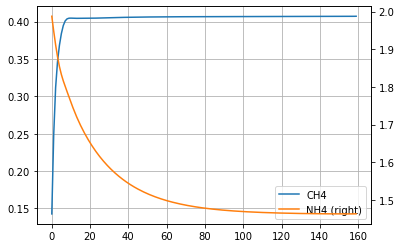

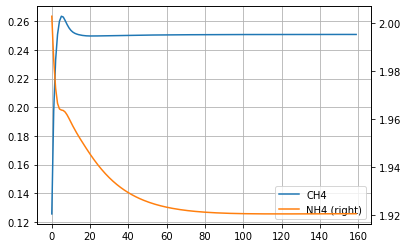

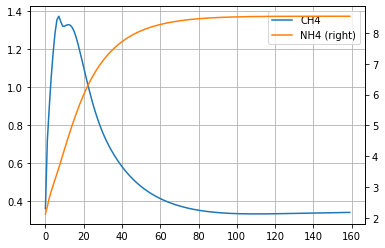

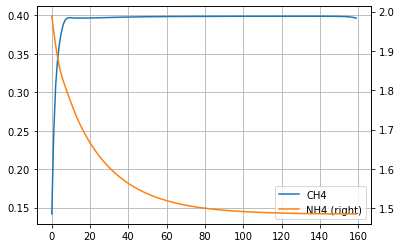

In [32]:
for i in range(4):
    batches[i][['CH4','NH4']].plot(secondary_y=['NH4'], grid=True)

<AxesSubplot:>

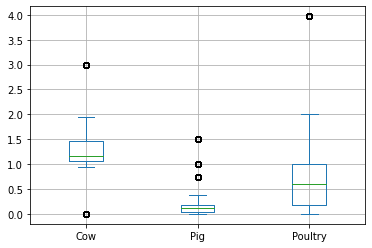

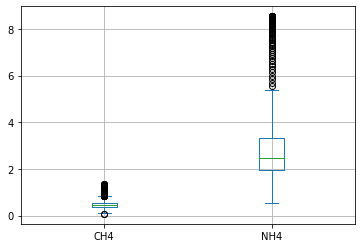

In [40]:
data_static[['Cow','Pig','Poultry']].plot(kind='box', grid=True)
data_static[['CH4','NH4']].plot(kind='box', grid=True)

array([[<AxesSubplot:title={'center':'Cow'}>,
        <AxesSubplot:title={'center':'Pig'}>],
       [<AxesSubplot:title={'center':'Poultry'}>,
        <AxesSubplot:title={'center':'CH4'}>],
       [<AxesSubplot:title={'center':'NH4'}>, <AxesSubplot:>]],
      dtype=object)

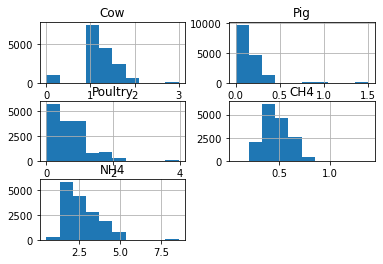

In [21]:
df.hist()